In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from utils import *

In [2]:
#Read file csv and print first 5 rows
bureau = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_bureau.csv")
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [3]:
#View dataframe dimension
print("bureau:\n-rows:",bureau.shape[0],"\n-columns:", bureau.shape[1])

bureau:
-rows: 1465325 
-columns: 17


In [4]:
#View columns
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

# Understanding of variables

CREDIT_ACTIVE - Current status of a Loan - Closed/ Active (2 values)

CREDIT_CURRENCY - Currency in which the transaction was executed - Currency1, Currency2, Currency3, Currency4 ( 4 values)

CREDIT_DAY_OVERDUE - Number of overdue days

CREDIT_TYPE - Consumer Credit, Credit card, Mortgage, Car loan, Microloan, Loan for working capital replemishment, Loan for Business development, Real estate loan, Unkown type of laon, Another type of loan. Cash loan, Loan for the purchase of equipment, Mobile operator loan, Interbank credit, Loan for purchase of shares ( 15 values )

DAYS_CREDIT - How many days before current application did client apply for Credit Bureau credit

DAYS_CREDIT_ENDDATE - Remaining duration of CB credit (in days) at the time of application in Home Credit

CREDIT_DAY_OVERDUE - Number of days past due on CB credit at the time of application for related loan in our sample

AMT_CREDIT_SUM - Total available credit for a customer

AMT_CREDIT_SUM_DEBT - Total amount yet to be repayed

AMT_CREDIT_SUM_LIMIT - Current Credit that has been utilized

AMT_CREDIT_SUM_OVERDUE - Current credit payment that is overdue

CNT_CREDIT_PROLONG - How many times was the Credit date prolonged

# NOTE:
For a given loan transaction 'AMT_CREDIT_SUM' = 'AMT_CREDIT_SUM_DEBT' +'AMT_CREDIT_SUM_LIMIT'

AMT_ANNUITY - Annuity of the Credit Bureau data

DAYS_CREDIT_UPDATE - Number of days before current application when last CREDIT UPDATE was received

DAYS_ENDDATE_FACT - Days since CB credit ended at the time of application

AMT_CREDIT_MAX_OVERDUE - Maximum Credit amount overdue at the time of application

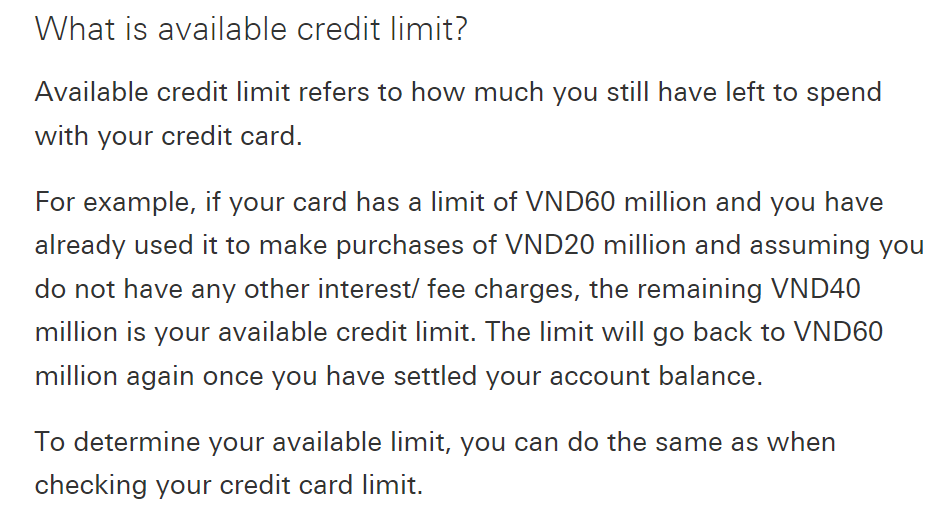

In [5]:
#total number of duplicate rows in bureau's column
bureau.duplicated().sum()

0

In [6]:
stat = StatisticAnalysis(bureau)

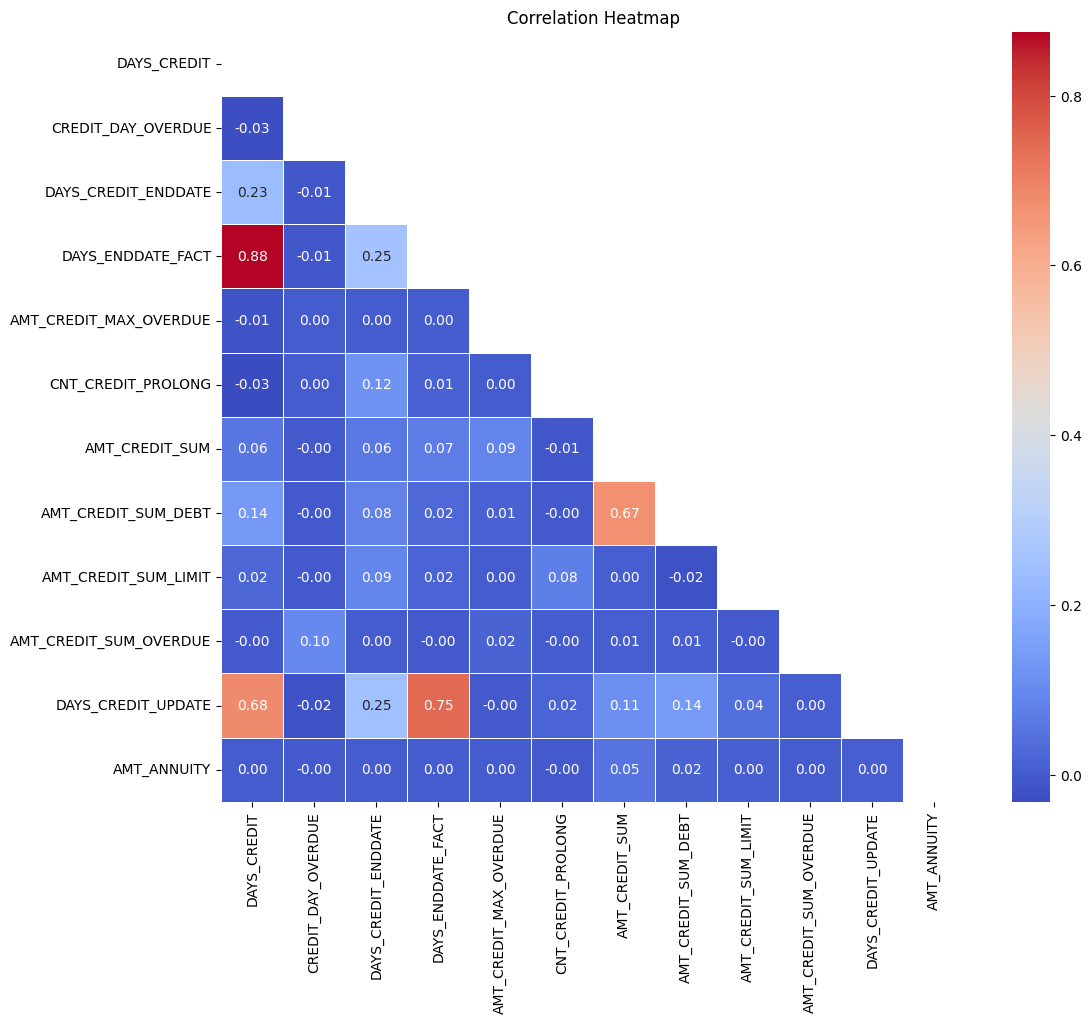

In [7]:
# Check correlation
stat.correlation(drop_cols=['SK_ID_BUREAU', 'SK_ID_CURR'])

In [8]:
#Number of unique values in each column
bureau.nunique()

SK_ID_BUREAU              1465325
CREDIT_ACTIVE                   4
CREDIT_CURRENCY                 4
DAYS_CREDIT                  2923
CREDIT_DAY_OVERDUE            893
DAYS_CREDIT_ENDDATE         13641
DAYS_ENDDATE_FACT            2916
AMT_CREDIT_MAX_OVERDUE      61066
CNT_CREDIT_PROLONG             10
AMT_CREDIT_SUM             211528
AMT_CREDIT_SUM_DEBT        202918
AMT_CREDIT_SUM_LIMIT        45290
AMT_CREDIT_SUM_OVERDUE       1440
CREDIT_TYPE                    15
DAYS_CREDIT_UPDATE           2980
AMT_ANNUITY                 30103
SK_ID_CURR                 263491
dtype: int64

For variables related to days, we can see that there are some observations with values ​​up to 365243.0, which if converted to years would be equivalent to more than 1000 years. This is in fact very absurd and makes no sense. In addition, there are also many debts that have an end date many days before or after. So here we only keep observations with a converted value of less than 50 years from the time of the loan at Home Credit.

In [9]:
# Drop outliers
bureau['DAYS_CREDIT_ENDDATE'][bureau['DAYS_CREDIT_ENDDATE'] < -50*365] = np.nan
bureau['DAYS_ENDDATE_FACT'][bureau['DAYS_ENDDATE_FACT'] < -50*365] = np.nan
bureau['DAYS_CREDIT_UPDATE'][bureau['DAYS_CREDIT_UPDATE'] < -50*365] = np.nan
bureau['DAYS_CREDIT_ENDDATE'][bureau['DAYS_CREDIT_ENDDATE'] > 50*365] = np.nan
bureau['DAYS_ENDDATE_FACT'][bureau['DAYS_ENDDATE_FACT'] > 50*365] = np.nan
bureau['DAYS_CREDIT_UPDATE'][bureau['DAYS_CREDIT_UPDATE'] > 50*365] = np.nan

In [10]:
# Size of bureau after drop outliers
bureau.shape

(1465325, 17)

SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        121608
DAYS_ENDDATE_FACT          544674
AMT_CREDIT_MAX_OVERDUE     948545
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                  3
AMT_CREDIT_SUM_DEBT        223094
AMT_CREDIT_SUM_LIMIT       489670
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE             95
AMT_ANNUITY               1130013
SK_ID_CURR                      0
dtype: int64


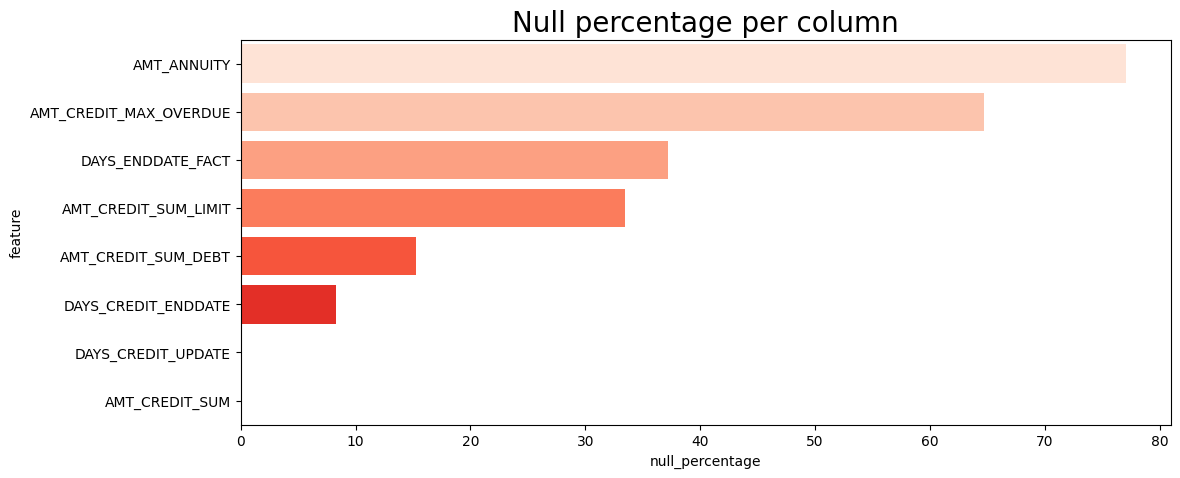

In [11]:
stat.check_null()

## EDA

In [12]:
# Import SK_ID_CURR and TARGET column from application_train
target = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_application_train.csv", usecols = ['TARGET', 'SK_ID_CURR'])
target.head()

,TARGET,SK_ID_CURR
0,0,278621
1,0,139008
2,0,138348
3,0,64140
4,0,219374


In [13]:
# Merge target with bureau
data_merged = pd.merge(target, bureau, how='left', on=['SK_ID_CURR'])
data_merged.head(10)

,TARGET,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,0,278621,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN
1,0,278621,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN
2,0,278621,5885879.0,Closed,currency 1,-775.0,0.0,-420.0,-621.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit,-550.0,NaN
3,0,278621,5885880.0,Active,currency 1,-606.0,0.0,1216.0,NaN,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card,-43.0,NaN
4,0,139008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,138348,5987200.0,Closed,currency 1,-1149.0,0.0,-783.0,-783.0,0.0,0.0,146250.0,0.0,0.0,0.0,Consumer credit,-783.0,NaN
6,0,64140,6491433.0,Closed,currency 1,-1097.0,0.0,-853.0,-1028.0,NaN,0.0,105705.0,0.0,0.0,0.0,Consumer credit,-1027.0,NaN
7,0,64140,6491434.0,Active,currency 1,-78.0,0.0,471.0,NaN,0.0,0.0,267606.0,240057.0,0.0,0.0,Consumer credit,-16.0,NaN
8,0,64140,6491432.0,Closed,currency 1,-1097.0,0.0,-792.0,-790.0,NaN,0.0,95134.5,0.0,0.0,0.0,Consumer credit,-790.0,NaN
9,0,219374,5576630.0,Active,currency 1,-1138.0,0.0,689.0,NaN,NaN,0.0,675000.0,348007.5,0.0,0.0,Consumer credit,-18.0,NaN


In [14]:
# Wanted palette details
new_palette = ['#EB0524', 'grey', '#B0041D', 'black']
color_codes_wanted = ['C1', 'C2', 'C3', 'C4']
c = lambda x: enmax_palette[color_codes_wanted.index(x)]

Total Number of unique categories of CREDIT_ACTIVE = 5


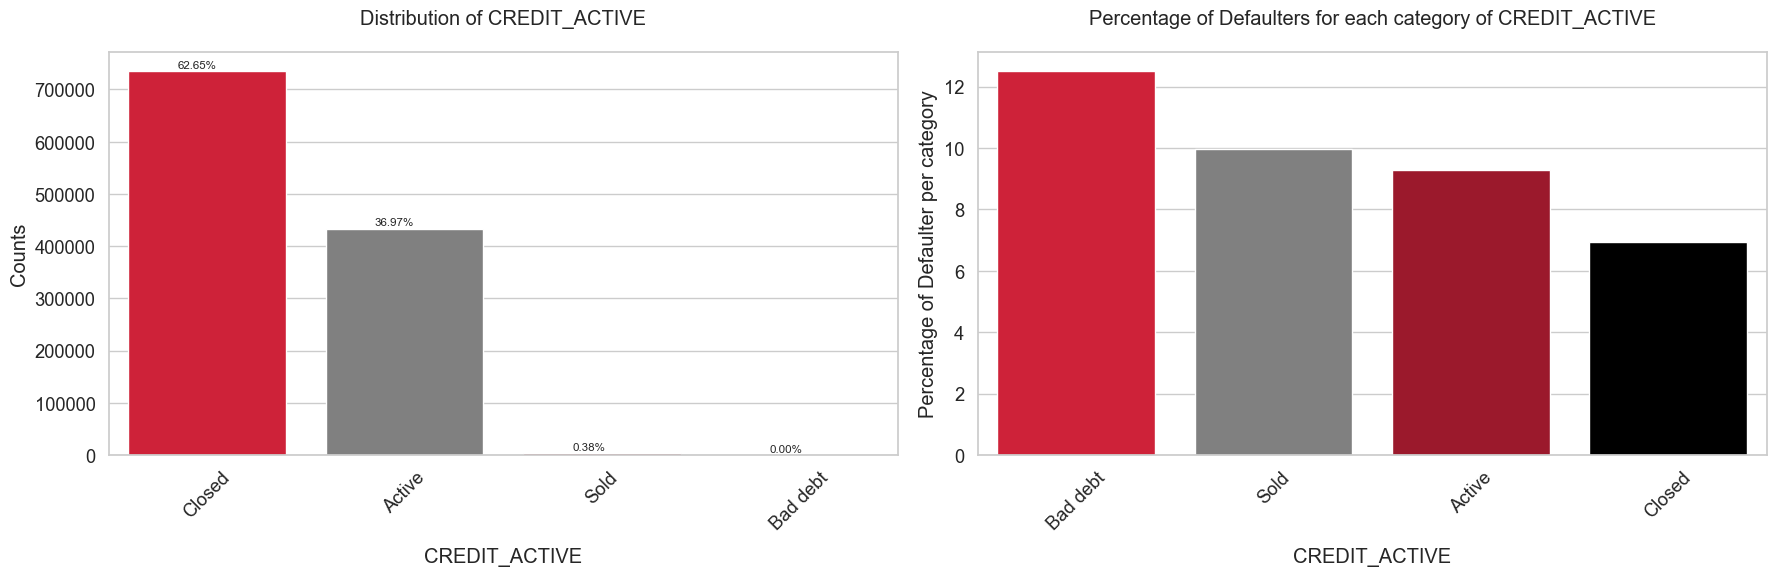

In [15]:
# CREDIT_ACTIVE analysis
plot_categorical_variables_bar(data_merged,'CREDIT_ACTIVE',rotation=45, horizontal_adjust=0.25,color=new_palette)

The higher the 'Bad debt', 'Sold' and 'Active' loans a customer has, the higher his or her chances of becoming a defaulter.

Total Number of unique categories of CREDIT_CURRENCY = 5


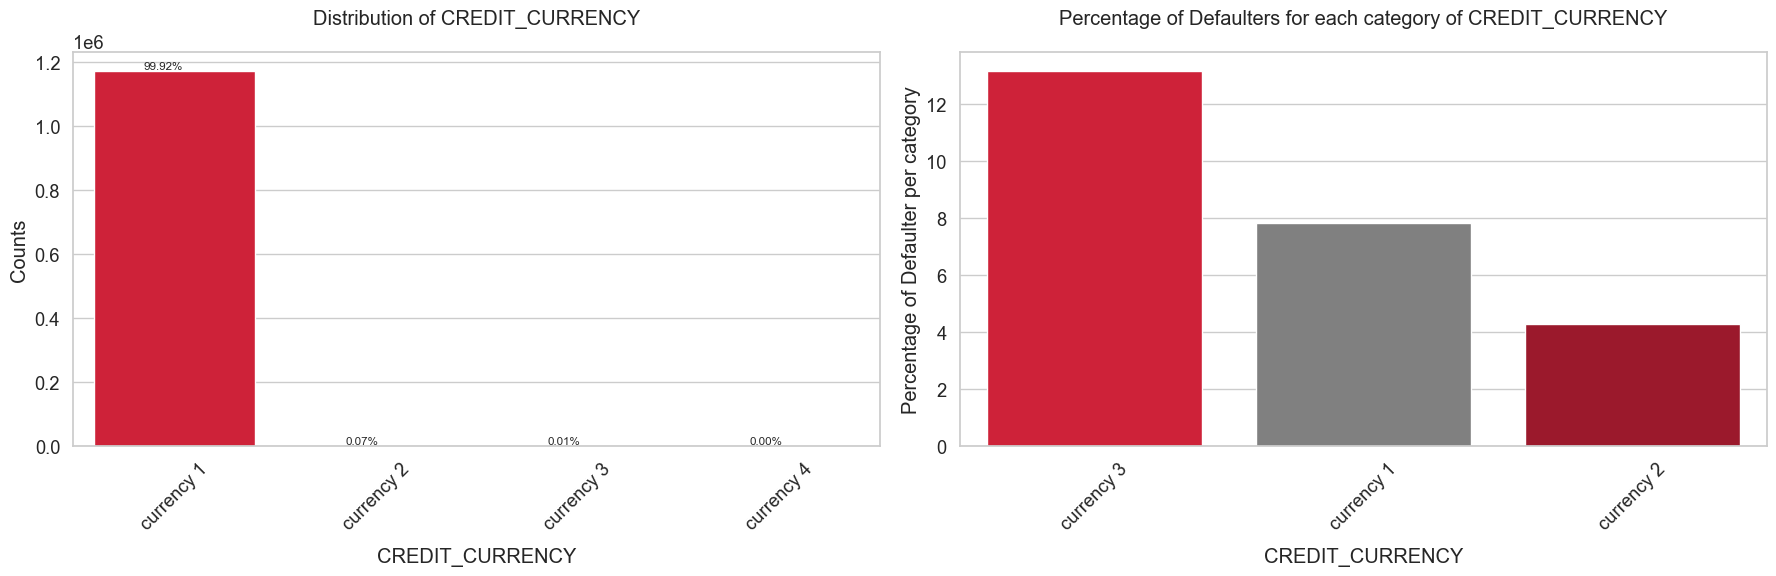

In [16]:
# CREDIT_CURRENCY analysis
plot_categorical_variables_bar(data_merged,'CREDIT_CURRENCY',rotation=45, horizontal_adjust=0.25, color=new_palette)

Most customer loans are in 'currency 1'. Customers who borrow in currency 3 have a high risk of becoming defaulters.

Total Number of unique categories of CREDIT_TYPE = 16


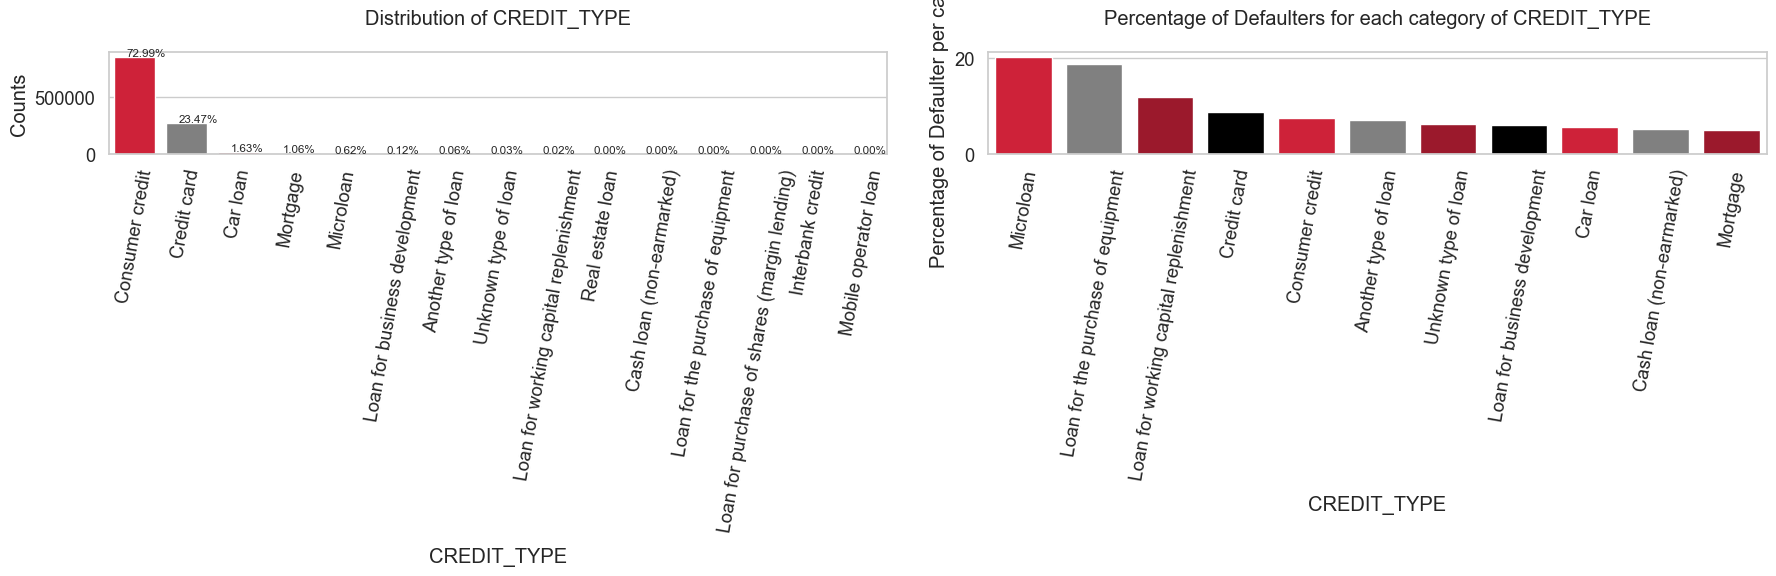

In [17]:
# CREDIT_TYPE analysis
plot_categorical_variables_bar(data_merged,'CREDIT_TYPE',rotation=80, horizontal_adjust=0.25, color=new_palette)

- Microloans and Loan for the purchase of equipment has very high percentage of defaulters.  
- Credit card loan has higher percentage of defaulter than consumer credit.
- Car loans and mortgages appear to be relatively low risk.

### Numerical variables

In [18]:
# Represents 'DAYS_CREDIT' in years
data_merged['YEARS_CREDIT'] = abs(data_merged['DAYS_CREDIT'] / 365)

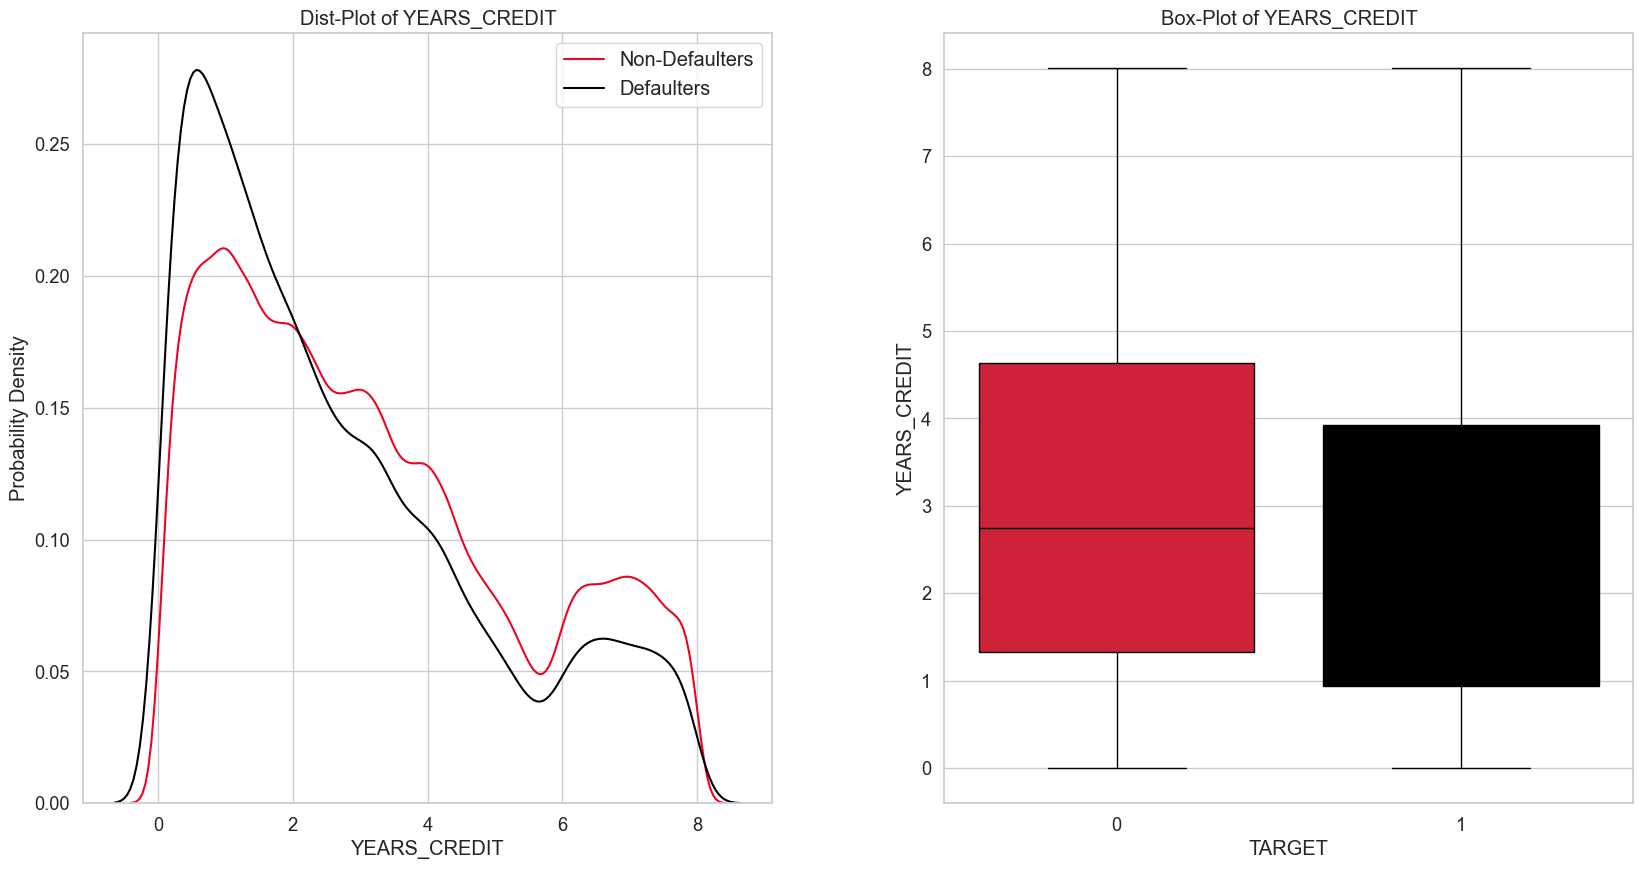

In [19]:
# DAYS_CREDIT analysis
plot_continuous_variables(data_merged,'YEARS_CREDIT', plots = ['distplot','box'],figsize=(20,10))

From this plot, we observe that the Non-Defaulters usually have longer DAYS_CREDIT as compared to Defaulters. This can be visualized both from the Box-Plot and the PDF. The Defaulters have a higher Peak in PDF in lower YEARS_CREDIT range of values.

## Credit duration

In [20]:
# New feature CREDIT_DURATION
data_merged['CREDIT_DURATION'] = (-data_merged['DAYS_CREDIT'] + data_merged['DAYS_CREDIT_ENDDATE'])/365

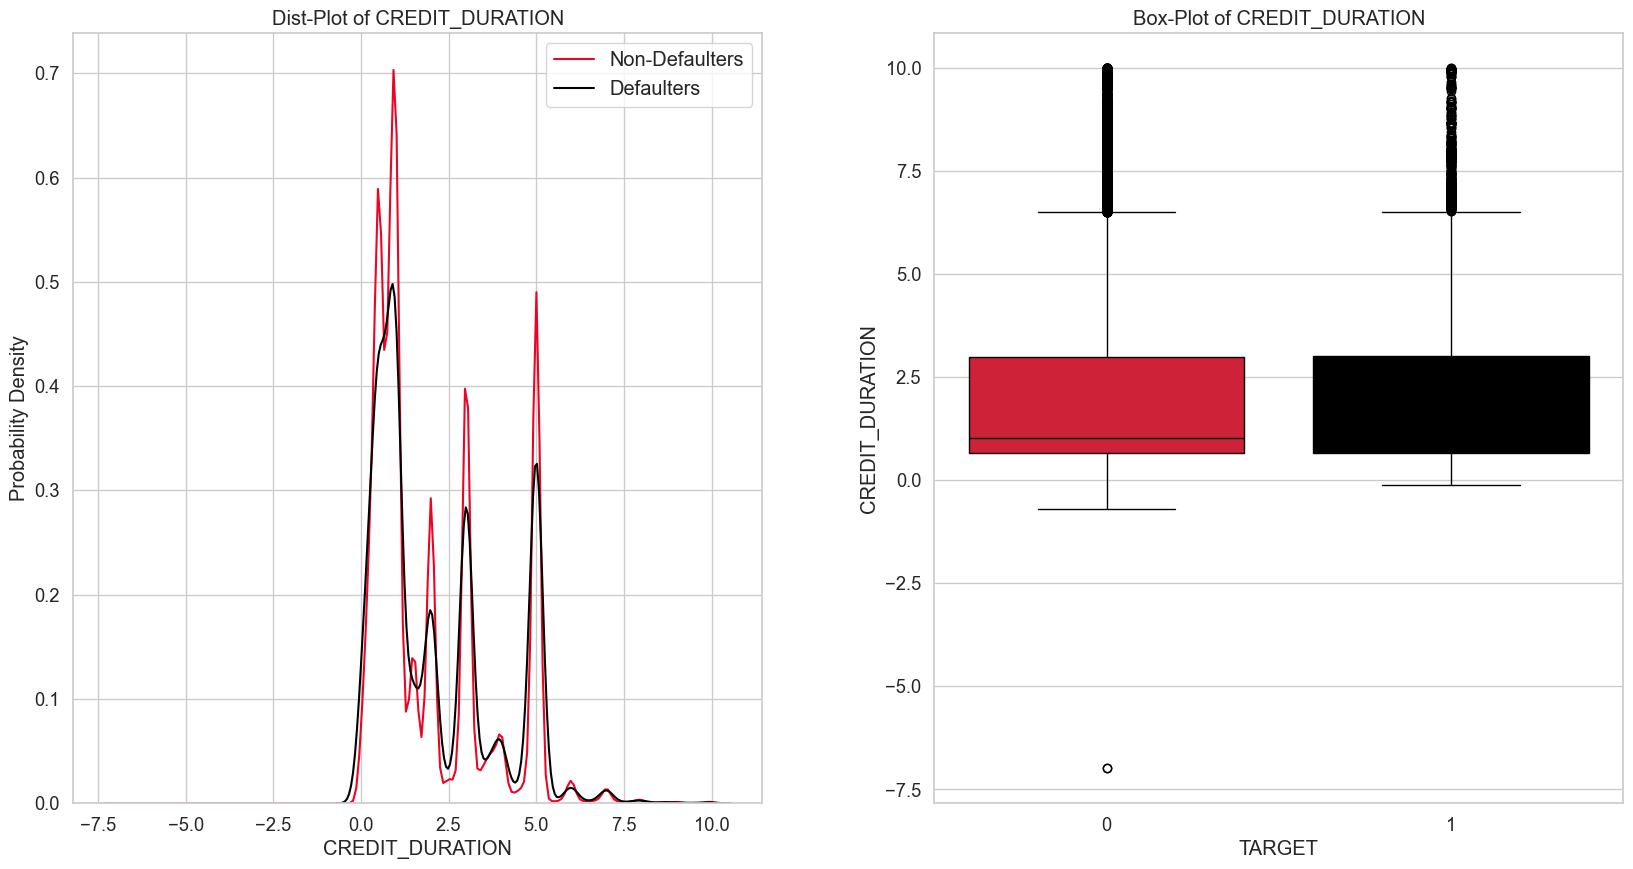

In [21]:
# CREDIT_DURATION analysis
plot_continuous_variables(data_merged,'CREDIT_DURATION', plots = ['distplot','box'], scale_limits = (-10,10),figsize=(20,10))

Defaulter usually have higher credit duration than Non-Defaulter.

## Enddate different

In [22]:
# New feature ENDDATE_DIF
data_merged['ENDDATE_DIF'] = (data_merged['DAYS_CREDIT_ENDDATE'] - data_merged['DAYS_ENDDATE_FACT'])/365

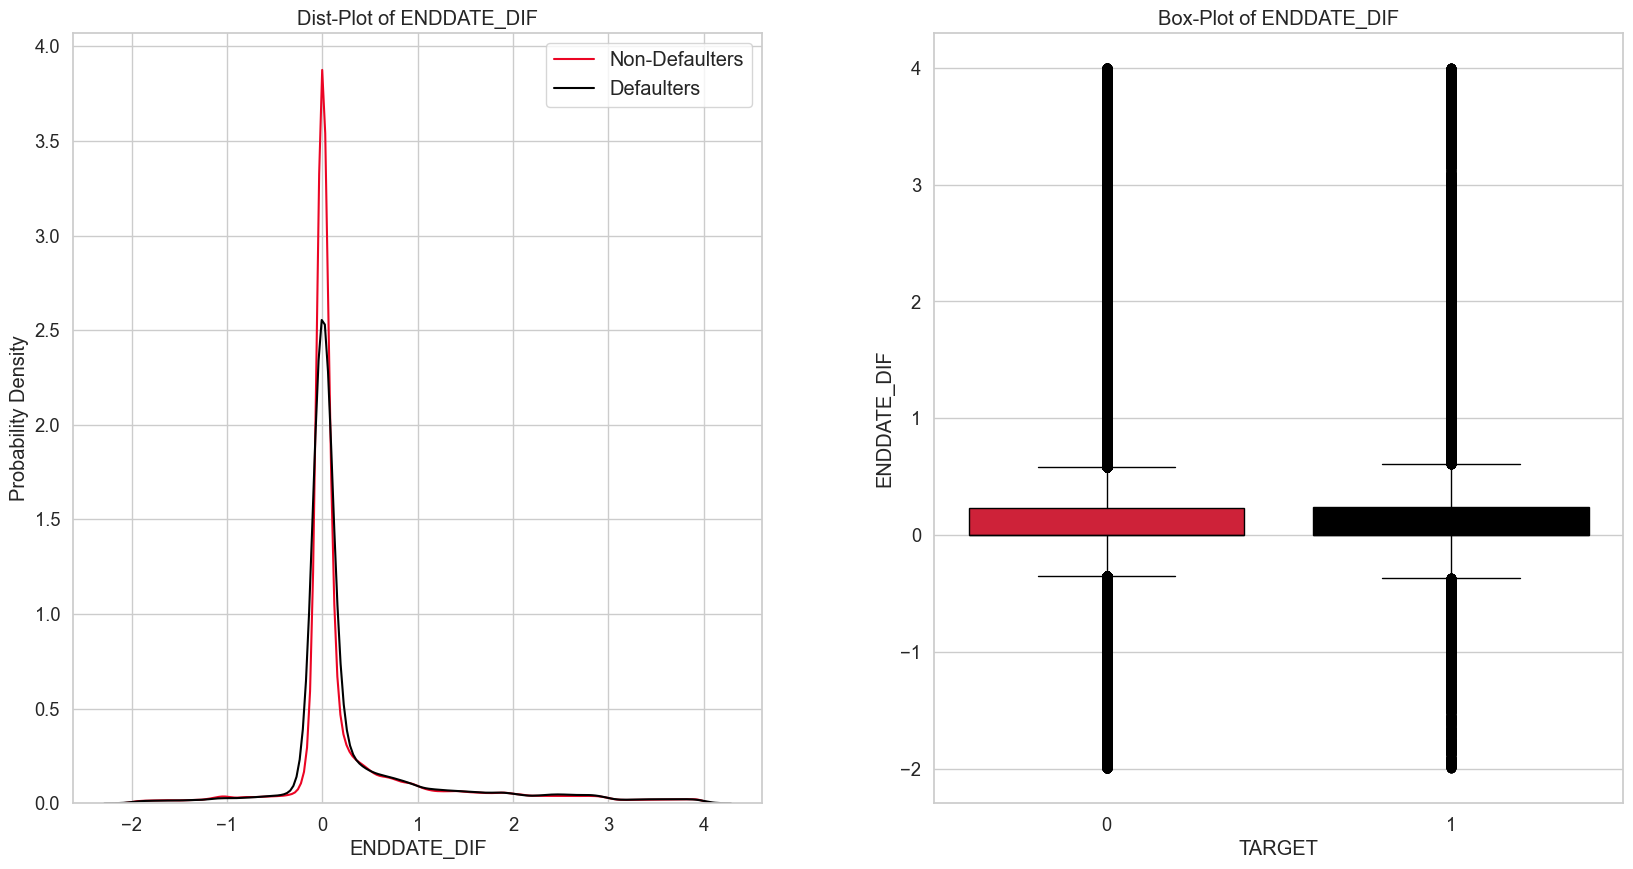

In [23]:
# ENDDATE_DIF analysis
plot_continuous_variables(data_merged,'ENDDATE_DIF', plots = ['distplot','box'], scale_limits = (-2,4), figsize=(20,10))

Non-Defaulters have ENDDATE_DIF(different between DAYS_CREDIT_ENDDATE and DAYS_ENDDATE_FACT) distribution more sharply at 0 than Defaulters

In [24]:
# Define new features
data_merged['DCREDIT_DOVERDUE_DIFF'] = data_merged['DAYS_CREDIT'] - data_merged['CREDIT_DAY_OVERDUE']
data_merged['DCREDIT_DENDFACT_DIFF'] = data_merged['DAYS_CREDIT'] - data_merged['DAYS_ENDDATE_FACT']
data_merged['DUPDATE_DENDATE_DIFF'] = data_merged['DAYS_CREDIT_UPDATE'] - data_merged['DAYS_CREDIT_ENDDATE']

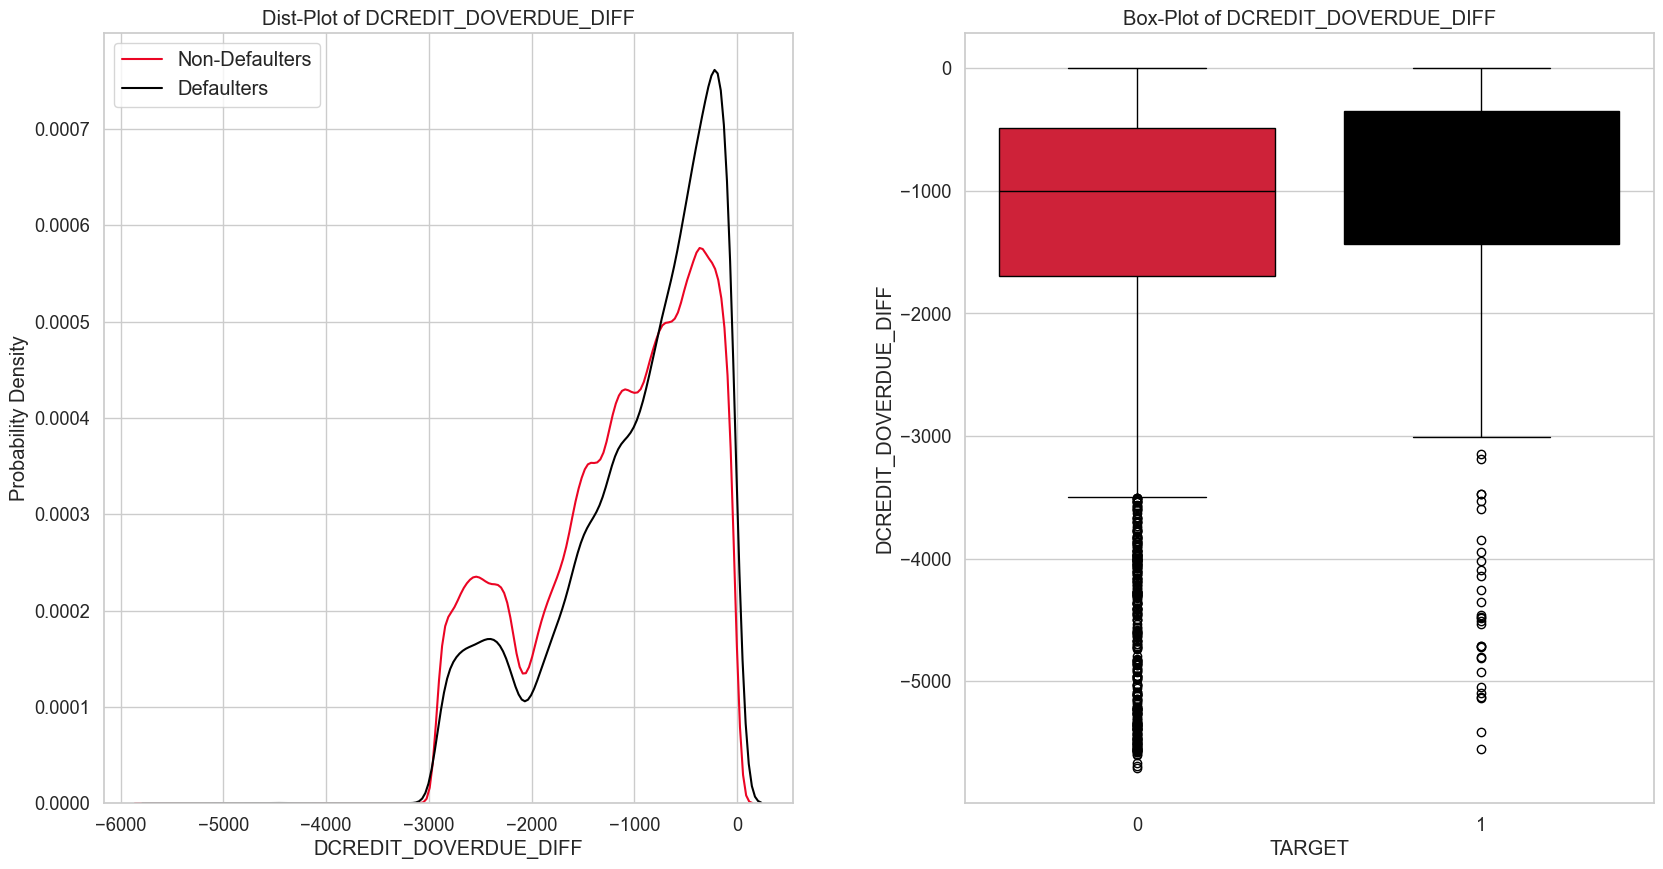

In [25]:
# DCREDIT_DOVERDUE_DIFF analysis
plot_continuous_variables(data_merged,'DCREDIT_DOVERDUE_DIFF', plots = ['distplot','box'],figsize=(20,10))

It can be seen from both the Box-Plot and the PDF that the Non-Defaulters usually have higher different between DAYS_CREDIT and CREDIT_DAY_OVERDUE as compared to Defaulters. The Defaulters have a higher Peak in PDF in range of values close to 0.

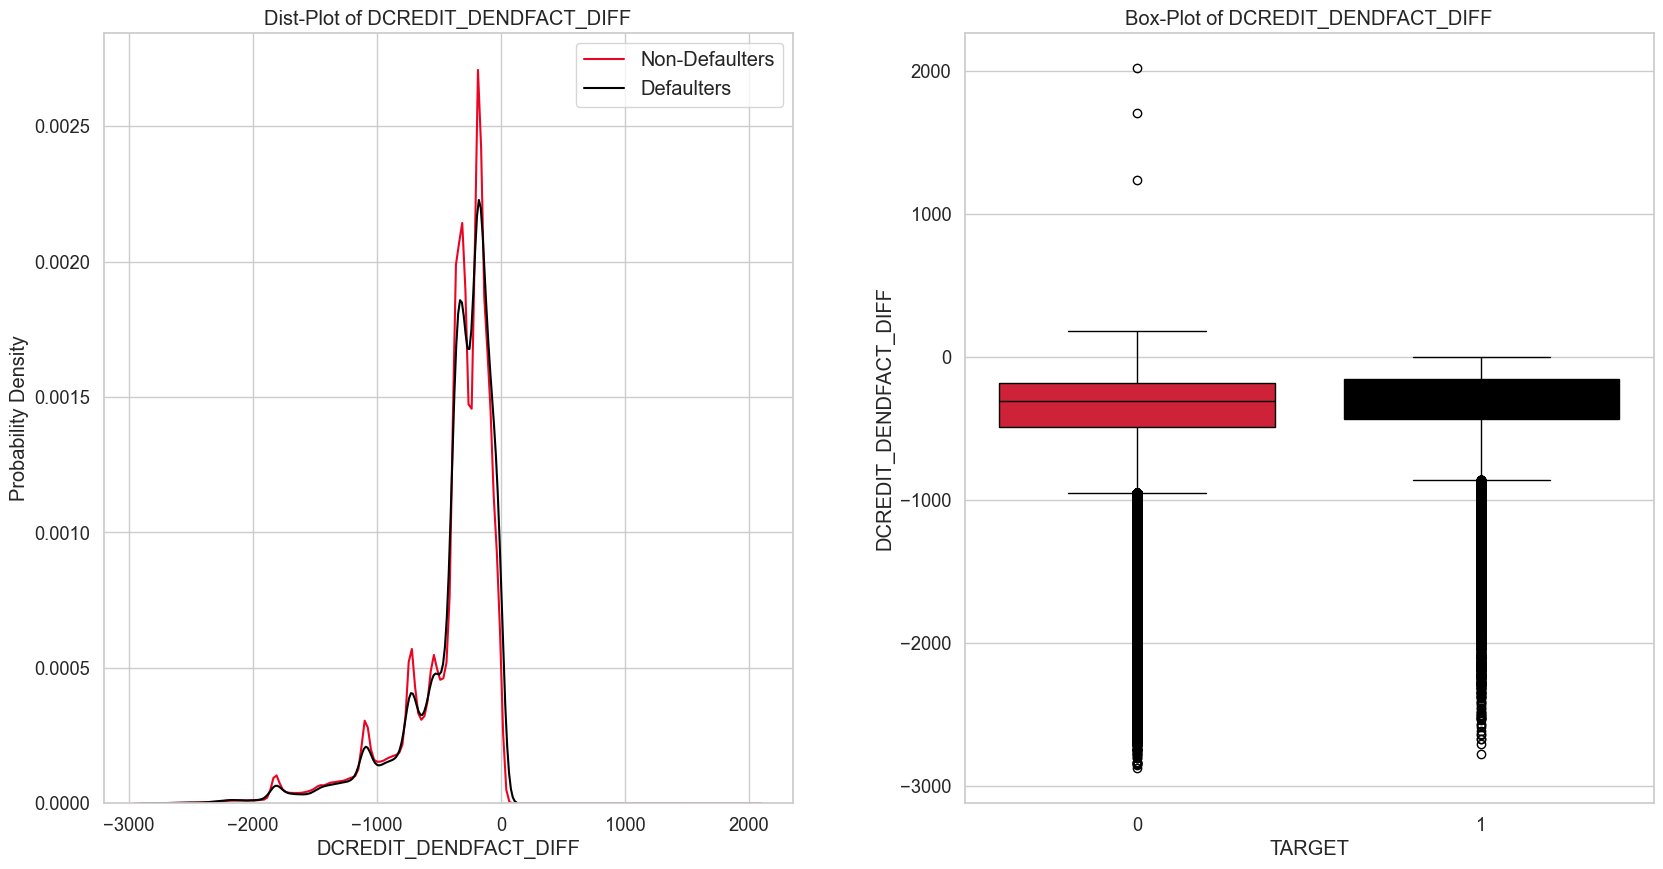

In [26]:
# DCREDIT_DENDFACT_DIFF analysis
plot_continuous_variables(data_merged,'DCREDIT_DENDFACT_DIFF', plots = ['distplot','box'],figsize=(20,10))

Non-Defaulters usually have higher different between DAYS_CREDIT and DAYS_ENDDATE_FACT as can be seen from the boxplot.

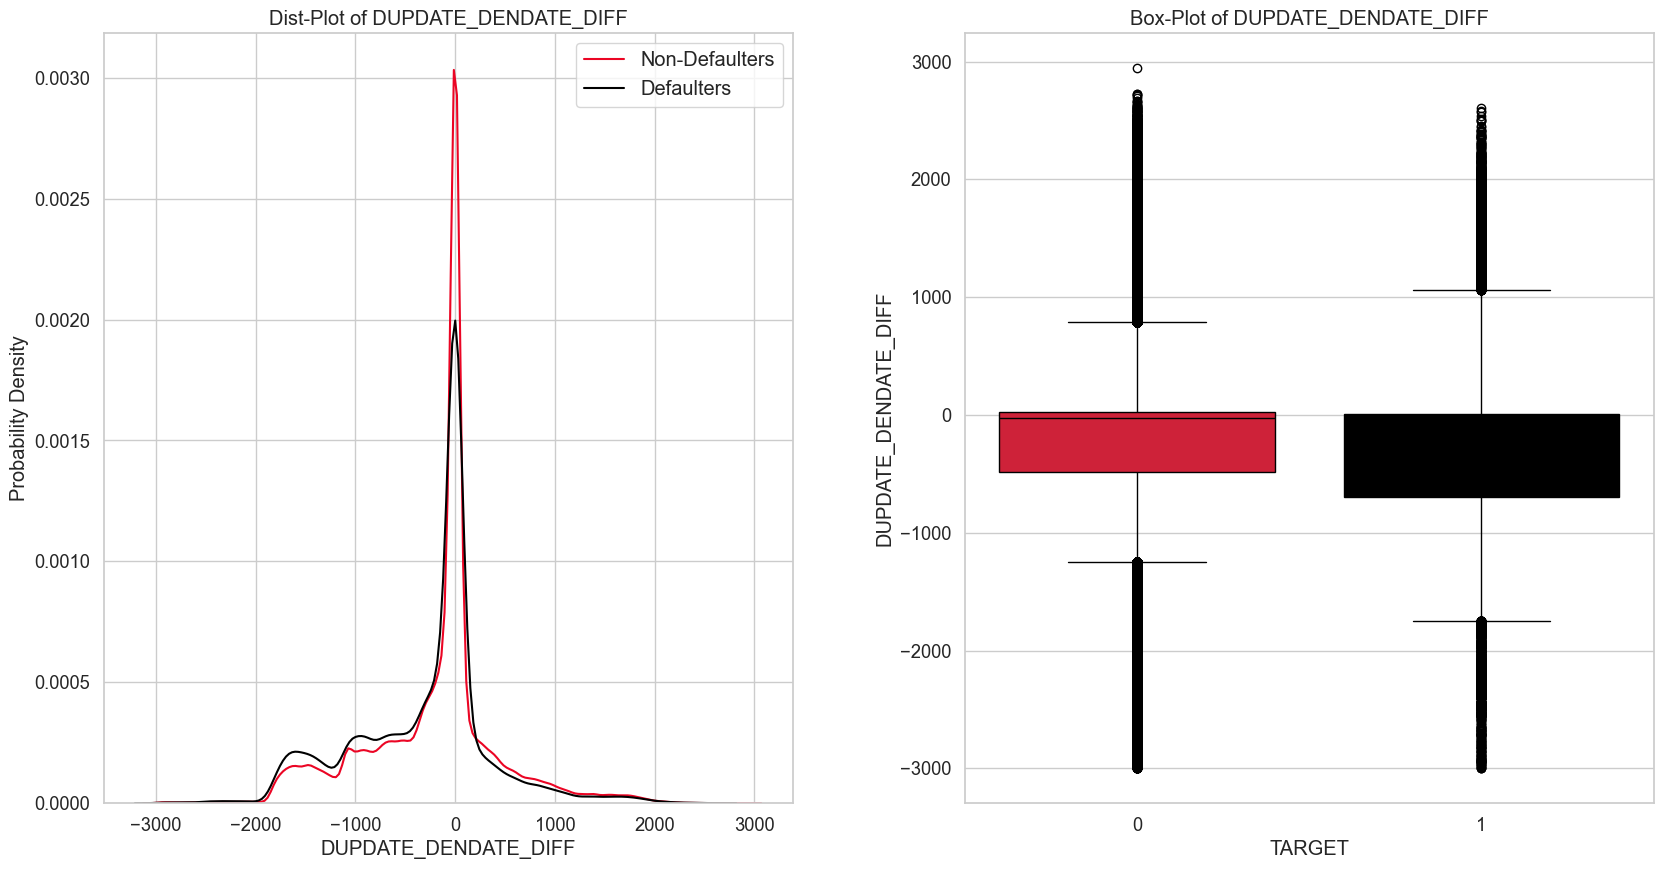

In [27]:
# DUPDATE_DENDATE_DIFF analysis
plot_continuous_variables(data_merged,'DUPDATE_DENDATE_DIFF', plots = ['distplot','box'],scale_limits = (-3000,3000),figsize=(20,10))

We observe that Non-Defaulters generally have the different between DAYS_CREDIT_UPDATE and DAYS_CREDIT_ENDDATE >= 0 while the trend is negative for Defaulters.

## Credit to debt ratio and difference

In [28]:
# Define new features
data_merged['DEBT_PERCENTAGE'] = data_merged['AMT_CREDIT_SUM']/data_merged['AMT_CREDIT_SUM_DEBT'] 
data_merged['DEBT_CREDIT_DIFF'] = data_merged['AMT_CREDIT_SUM'] - data_merged['AMT_CREDIT_SUM_DEBT']
data_merged['CREDIT_TO_ANNUITY_RATIO'] = data_merged['AMT_CREDIT_SUM'] / data_merged['AMT_ANNUITY']

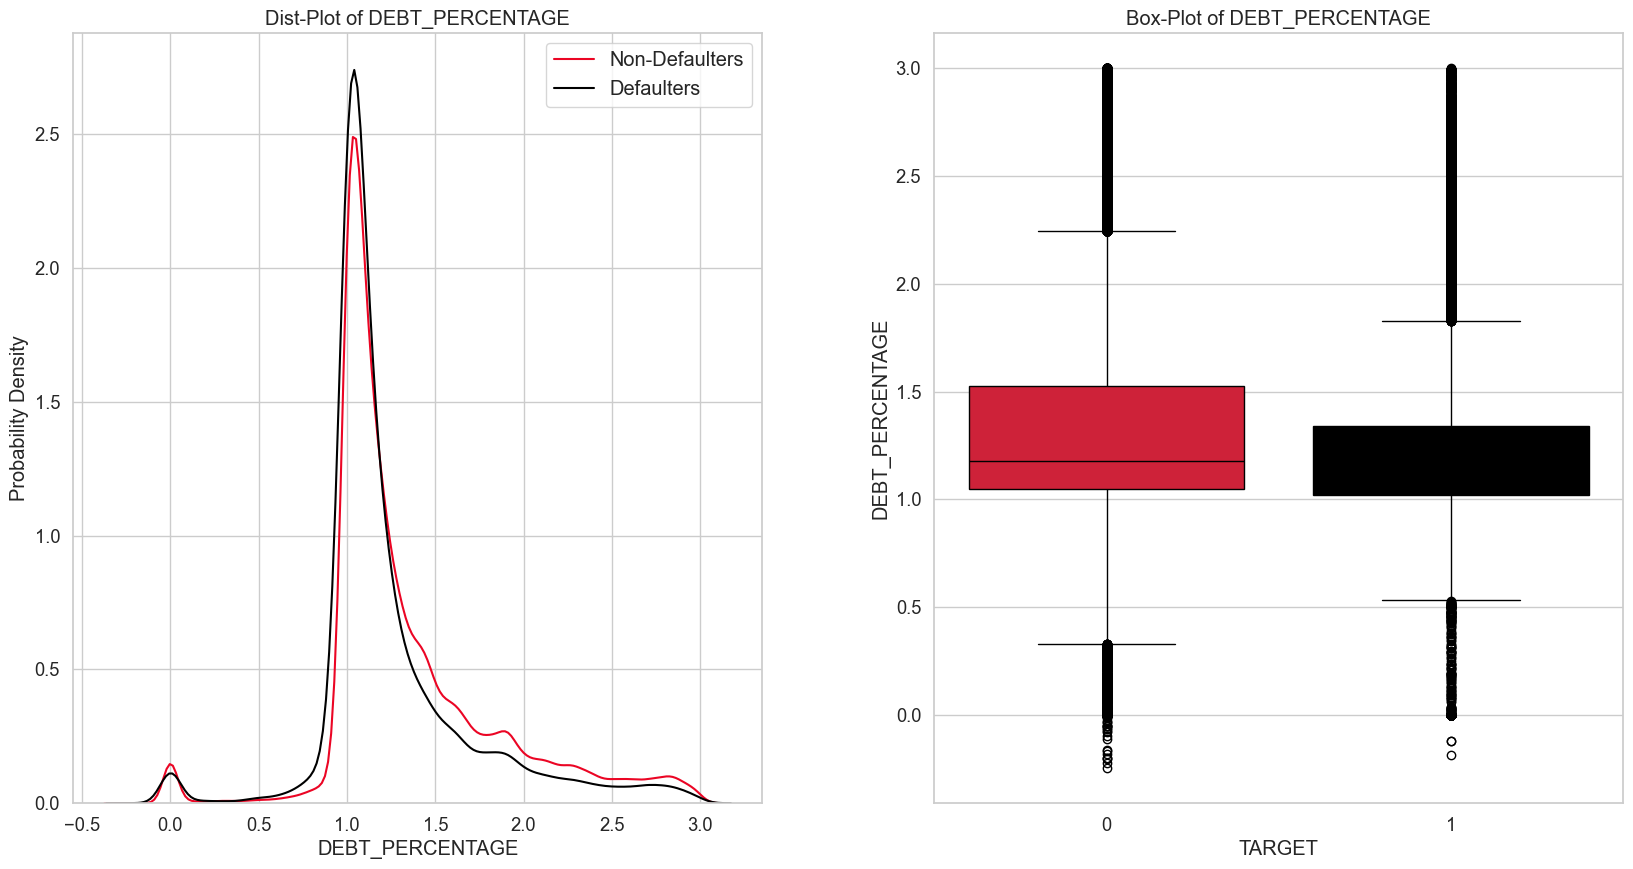

In [29]:
# DEBT_PERCENTAGE analysis
plot_continuous_variables(data_merged,'DEBT_PERCENTAGE', plots = ['distplot','box'], scale_limits = (-0.25,3), figsize=(20,10))

Non-Defaulters more usually have AMT_CREDIT_SUM/AMT_CREDIT_SUM_DEBT ratio > 1 than Defaulters. Which indicates that Non_defaulter group have less debt remain than Defaulter

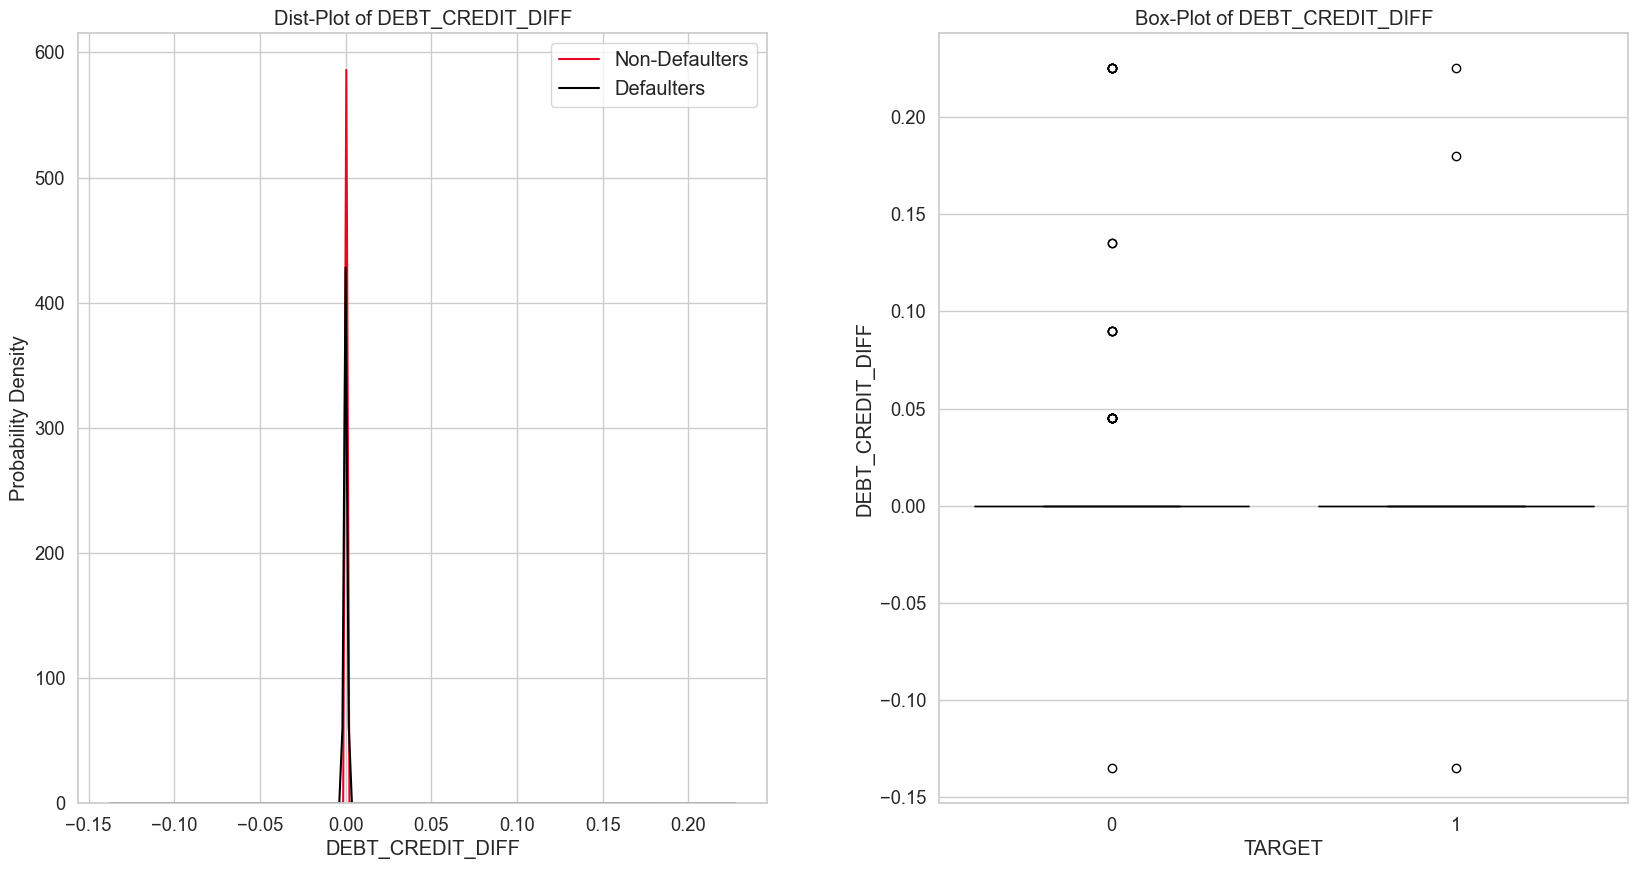

In [30]:
# DEBT_CREDIT_DIFF analysis
plot_continuous_variables(data_merged,'DEBT_CREDIT_DIFF', plots = ['distplot','box'],scale_limits = (-0.25, 0.25),  figsize=(20,10))

Non-Defaulters have DEBT_CREDIT_DIFF distribution more sharply at 0 than Defaulters

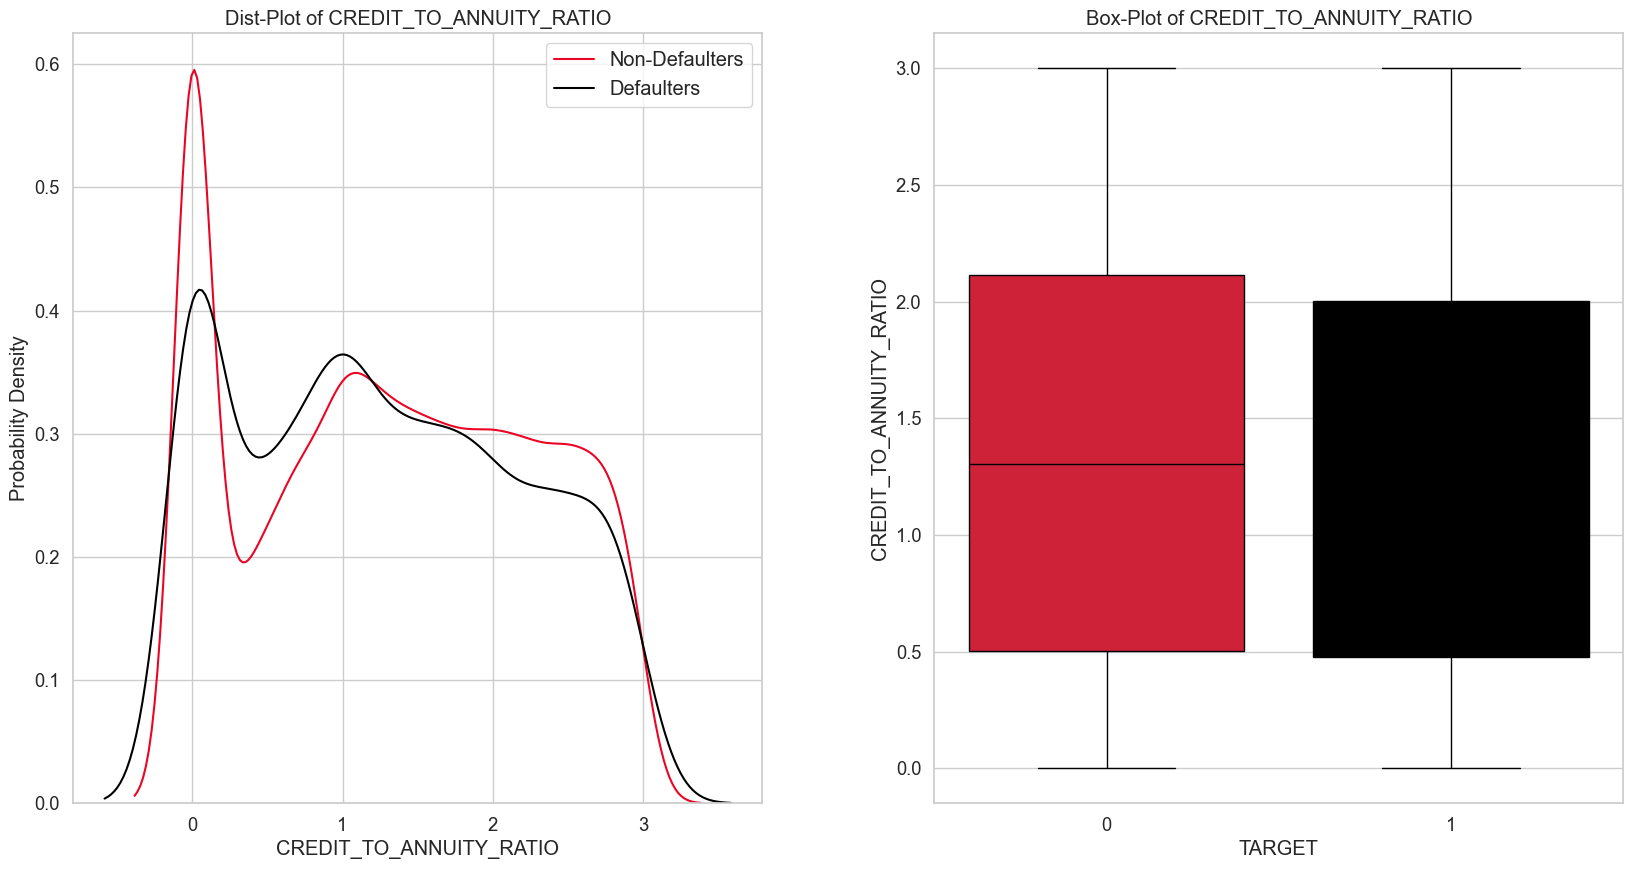

In [31]:
# CREDIT_TO_ANNUITY_RATIO analysis
plot_continuous_variables(data_merged,'CREDIT_TO_ANNUITY_RATIO', plots = ['distplot','box'], scale_limits = (-1,3), figsize=(20,10))

Non-Defaulters usually have longer credit terms compare to Defaulters